<a href="https://ifunny.co">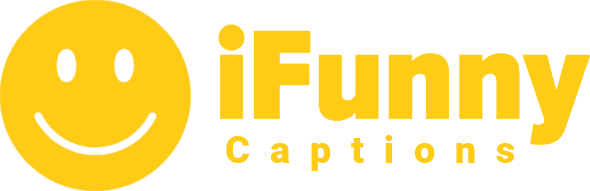</a>

　

<a href="https://github.com/kubinka0505/iFunny-Captions"><img src="https://img.shields.io/badge/github-open-lightgray?logo=github&logoColor=white&style=for-the-badge"></a>　<a href="https://youtu.be/Uf-D2iEOvDU"><img src="https://img.shields.io/badge/youtube-watch-ff0000?logo=youtube&logoColor=white&style=for-the-badge"></a>

In [ ]:
#@title # <font color="red">⬅</font> **1.** Install
#@markdown - ## `FFmpeg` >= 4.2.0
#@markdown - ## `gifsicle`
!add-apt-repository -y ppa:jonathonf/ffmpeg-4 > /dev/null 2>&0
!apt-get remove ffmpeg > /dev/null 2>&0
!apt-get remove gifsicle > /dev/null 2>&0
!apt-get update > /dev/null 2>&0
!apt-get install ffmpeg > /dev/null 2>&0
!apt-get install gifsicle > /dev/null 2>&0

In [ ]:
#@title # <font color="red">⬅</font> **2.** Clone repository
%cd -q /content/
!rm -rf *
!git clone https://github.com/kubinka0505/iFunny-Captions -q
%cd -q iFunny-Captions/
!rm Run.sh *.md

In [ ]:
#@title # <font color="red">⬅</font> **3.** Fill the data (<a href="https://github.com/kubinka0505/iFunny-Captions/#usage-">`Config.json`</a>) **AND THEN** press ▶
#@markdown ### `Text`
Content = "" #@param {type:"string"}
TEXT_CONTENT = Content
Wrap_Factor = 3 #@param {type:"integer"}
TEXT_WRAP = Wrap_Factor

#@markdown ### `Image`
Direct_URL = "" #@param {type:"string"}
IMAGE_URL = Direct_URL
Max_Width = 450 #@param {type:"integer"}
IMAGE_MAXWIDTH = Max_Width

#@markdown ### `Font`
Type = 2 #@param ["1", "2"] {type:"raw"}
FONT_TYPE = Type
Size = False #@param {type:"string"}
FONT_SIZE = Size

#@markdown ## `Settings`
Delay =  5#@param {type:"integer"}
SETTINGS_DELAY = Delay

#@markdown ### `Dark Mode`
Enabled = False #@param {type:"boolean"}
SETTINGS_DARKMODE_ENABLED = Enabled
After_Hour = 22 #@param ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"] {type:"raw"}
SETTINGS_DARKMODE_AFTERHOUR = After_Hour

In [ ]:
#@title # <font color="red">⬅</font> **4.** Process and display `Image`

"""iFunny Captions Generator.

Pack of scripts providing iFunny Captions
generation, but this time You can input your
own text and picture using `Config.json` file."""

import os
from json import load
from requests import get
from textwrap import wrap
from platform import system
from string import printable
from datetime import timedelta
from random import choice, randint
from time import sleep, strftime, time
from PIL import Image, ImageColor, ImageDraw, ImageFile, ImageFont

__author__		= "kubinka0505"
__copyright__	= __author__
__credits__		= [__author__, "SuperCuber"]
__version__		= "2.6"
__date__		= "24.11.2020"
__status__		= "Development"
__license__		= "GPL v1"

__SLASH = "/"

# Opening Scripts/Utils.py

print("Setting up utils...")
exec(open("/content/iFunny-Captions/Scripts/Utils.py").read())
Config = Config()

ImageFile.LOAD_TRUNCATED_IMAGES = True

Config["Text"]["Content"] = TEXT_CONTENT
Config["Text"]["Wrap_Factor"] = TEXT_WRAP
Config["Image"]["URL / Path"] = IMAGE_URL
Config["Image"]["Max_Width"] = IMAGE_MAXWIDTH
Config["Font"]["Type"] = FONT_TYPE
Config["Font"]["Size"] = FONT_SIZE
Config["Settings"]["Delay"] = SETTINGS_DELAY
Config["Settings"]["Dark_Mode"]["Enabled"] = SETTINGS_DARKMODE_ENABLED
Config["Settings"]["Dark_Mode"]["After_Hour"] = SETTINGS_DARKMODE_AFTERHOUR

os.environ["NAME"] = "{0}_{1}".format(TEXT_CONTENT.\
	replace(" ", "_").\
	replace("\\", "_").\
	replace("/", "_").\
	replace(":", "_").\
	replace("*", "_").\
	replace("?", "_").\
	replace('"', "_").\
	replace("<", "_").\
	replace(">", "_").\
	replace("|", "_").\
	encode().decode("utf-8", errors = "strict")[0:192],
	Random_String(8)
	)

os.environ["URL"] = Get_Service(IMAGE_URL)
os.environ["DELAY"] = str(SETTINGS_DELAY)

# Error Handling

if get(Get_Service(IMAGE_URL)).status_code != 200: exit("\nURL returns status code {0} ({1}).\nImage will not be processed.".format(Site.status_code, Site.reason.title()))

# Image to Frames conversion

print("Converting URL Image to Frames... (This can take a while)")
!ffmpeg -i $URL -vsync 2 Frame_%06d.png -hide_banner -loglevel panic

Frames = [File for File in os.listdir(os.getcwd()) if File.endswith("png")]
Frames.sort(key = str)

# GIF Making Process

print("Making {0}...".format("PNG" if len(Frames) == 1 else "GIF"))
for Frame in Frames:
	Caption = Image.open(Frame)
	#---#
	exec(open("/content/iFunny-Captions/Scripts/Caption.py").read())
	exec(open("/content/iFunny-Captions/Scripts/Gifer.py").read())
	#---#
	Captionized.save(Frame)

print("Saving {0}...".format("PNG" if len(Frames) == 1 else "GIF"))

# Saving Image

if len(Frames) == 1:
	GIF = Image.open(Frames[0])
	GIF.save("/content/iFunny-Captions/Images/{0}.png".format(os.environ["NAME"]))

if not len(Frames) == 1:
	!ffmpeg -i Frame_%06d.png -vf palettegen=reserve_transparent=1 Palette.png -y -hide_banner -loglevel panic
	!ffmpeg -i Frame_%06d.png -i Palette.png -lavfi paletteuse=alpha_threshold=128 -gifflags -offsetting Images/$NAME.gif -y -hide_banner -loglevel panic
	!gifsicle --careful -d=$DELAY -b Images/$NAME.gif -w

# Frames Removal

print("Removing {0}...".format("Image" if len(Frames) == 1 else "Frames"))
[os.remove("{0}/{1}".format(os.getcwd(), Frame)) for Frame in os.listdir(os.getcwd()) if Frame.endswith("png")]
print("Done!\n\n{0}\n".format("-" * 64))

# Displaying Image

def Display(FileName: str):
    import base64
    from IPython import display
	#---#
    with open(FileName, 'rb') as fd: b64 = base64.b64encode(fd.read()).decode('ascii')
	#---#
    return display.HTML('<img src="data:image/gif;base64,{0}" />'.format(b64))

print("Displaying... (This can take a while)\n")
Display('/content/iFunny-Captions/Images/{0}.{1}'.format(os.environ["NAME"], "png" if len(Frames) == 1 else "gif"))

---

In [ ]:
#@title #<font color="gold">⬅</font> Optional
#@markdown - Remove <font color="red">**ALL**</font> captions (<font color="red">**no undo**</font>)
%cd -q /content/iFunny-Captions/Images/
!rm *
%cd -q ..